In [1]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree, svm, preprocessing, utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix, mean_squared_error, accuracy_score

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [72]:
df = pd.read_csv('motorcycle_model_ready_data')

In [73]:
df['mileage'].mean()

15389.231092707241

In [4]:
keepidx = (df.title.drop_duplicates().index)
df = df.loc[keepidx].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17583 entries, 0 to 27767
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17583 non-null  int64  
 1   title           17583 non-null  object 
 2   year            17583 non-null  float64
 3   price           17583 non-null  float64
 4   neighborhood    15711 non-null  object 
 5   description     17583 non-null  object 
 6   url             17583 non-null  object 
 7   model           17583 non-null  object 
 8   vin             17583 non-null  int64  
 9   condition       17583 non-null  int64  
 10  cryptocurrency  17583 non-null  int64  
 11  delivery        17583 non-null  int64  
 12  engine_size     17583 non-null  float64
 13  fuel_type       16897 non-null  object 
 14  mileage         17583 non-null  float64
 15  color           17543 non-null  object 
 16  street_legal    17583 non-null  int64  
 17  title_status    17567 non-null 

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17583 entries, 0 to 17582
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17583 non-null  int64  
 1   title           17583 non-null  object 
 2   year            17583 non-null  float64
 3   price           17583 non-null  float64
 4   neighborhood    15711 non-null  object 
 5   description     17583 non-null  object 
 6   url             17583 non-null  object 
 7   model           17583 non-null  object 
 8   vin             17583 non-null  int64  
 9   condition       17583 non-null  int64  
 10  cryptocurrency  17583 non-null  int64  
 11  delivery        17583 non-null  int64  
 12  engine_size     17583 non-null  float64
 13  fuel_type       16897 non-null  object 
 14  mileage         17583 non-null  float64
 15  color           17543 non-null  object 
 16  street_legal    17583 non-null  int64  
 17  title_status    17567 non-null 

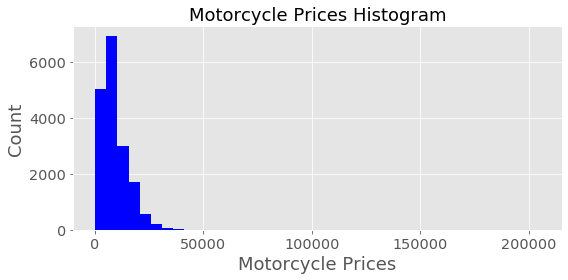

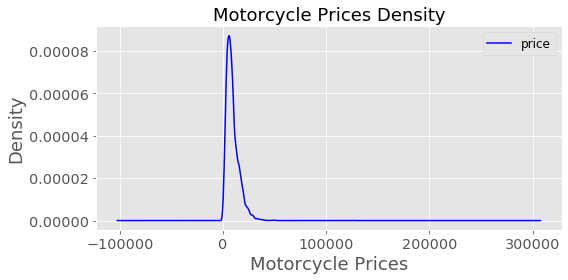

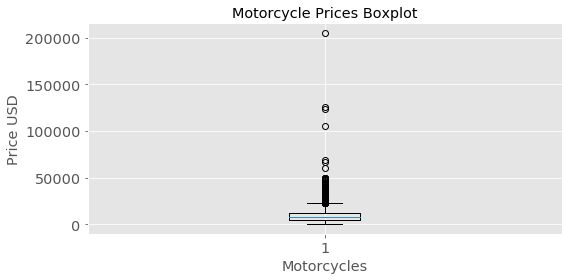

In [8]:
# Let's build some plots and view our price data with a different perspective
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'years plotted by row')

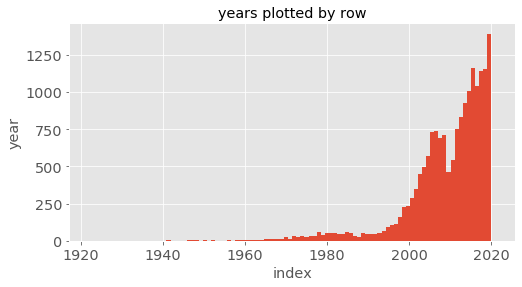

In [9]:
plt.hist(df['year'], 100)
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [10]:
df.drop(df.columns[0], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17583 entries, 0 to 17582
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           17583 non-null  object 
 1   year            17583 non-null  float64
 2   price           17583 non-null  float64
 3   neighborhood    15711 non-null  object 
 4   description     17583 non-null  object 
 5   url             17583 non-null  object 
 6   model           17583 non-null  object 
 7   vin             17583 non-null  int64  
 8   condition       17583 non-null  int64  
 9   cryptocurrency  17583 non-null  int64  
 10  delivery        17583 non-null  int64  
 11  engine_size     17583 non-null  float64
 12  fuel_type       16897 non-null  object 
 13  mileage         17583 non-null  float64
 14  color           17543 non-null  object 
 15  street_legal    17583 non-null  int64  
 16  title_status    17567 non-null  object 
 17  transmission    17583 non-null 

In [12]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot'], axis=1).to_numpy()
y1 = df['price'].to_numpy()

In [13]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [14]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error : ', mean_squared_error(y1_test, y_pred))

R Squared :  		 0.3704051833612129
Out of Bag Score :  	 0.2855872543881992
Mean Squared Error :  24556954.759870134


In [15]:
np.sqrt(mean_squared_error(y1_test, y_pred))

4955.49742809641

In [16]:
for idx,_ in enumerate(y1_test - y_pred):
    print(y1_test[idx], '\t\t',':',_)

9599.0 		 : -946.1100000000006
1975.0 		 : 149.51125000000002
8995.0 		 : -490.4899999999998
3495.0 		 : -3029.583333333334
11971.0 		 : -5668.810000000001
7800.0 		 : 915.6401561889552
8900.0 		 : -267.720416666667
11500.0 		 : 2940.0699999999997
8000.0 		 : -2610.0650000000005
11800.0 		 : 110.9950000000008
5700.0 		 : -1822.1499999999996
8000.0 		 : -403.6200000000008
13900.0 		 : 2997.459999999999
5000.0 		 : -526.4942501705709
7999.0 		 : 214.1800000000003
23999.0 		 : 8307.16
6000.0 		 : -1699.2349999999997
14988.0 		 : 6661.0650000000005
5999.0 		 : -281.47999999999956
4500.0 		 : -2450.5299999999997
11700.0 		 : 56.79999999999927
4800.0 		 : -11105.79
7000.0 		 : -1059.8950000000004
800.0 		 : -969.523221916972
5899.0 		 : -4088.0699999999997
6000.0 		 : -3792.709999999999
24995.0 		 : 12098.89
3200.0 		 : -362.66499999999996
4950.0 		 : -1792.3247619047606
14900.0 		 : 10102.6
6000.0 		 : 182.1399999999985
11000.0 		 : 7884.38492063492
5400.0 		 : -7665.1499357142875
13650.0 	

6000.0 		 : -1393.6731818181815
20000.0 		 : 15731.826666666668
5450.0 		 : -2446.452854541155
5499.0 		 : 236.86499999999978
4000.0 		 : -1526.494250170571
20000.0 		 : 5863.959999999999
10899.0 		 : 432.3649999999998
3100.0 		 : -1514.7839394637995
10100.0 		 : -2070.944734182898
16000.0 		 : 6448.465
650.0 		 : -872.7249999999999
13477.0 		 : -606.75
20000.0 		 : 1591.0633333333353
21999.0 		 : 2108.3250766594538
2500.0 		 : -2738.563409090909
7301.0 		 : -4563.207945766602
30999.0 		 : 8136.695
13995.0 		 : 963.6599999999999
11200.0 		 : -1991.4400000000005
16988.0 		 : -1596.630000000001
10000.0 		 : 1814.875
15599.0 		 : 2916.7649999999994
7500.0 		 : 2028.5699399032665
5197.0 		 : -1574.5299999999997
5200.0 		 : -3229.8827966721165
9999.0 		 : -4025.965
10649.0 		 : -873.5650000000005
7999.0 		 : 3209.91
12199.0 		 : 5406.323809523806
6499.0 		 : -1864.58
2600.0 		 : -10153.241360975673
13000.0 		 : 8138.250986842105
2500.0 		 : -3667.00003602357
5995.0 		 : -1212.62
13000.0 		 

6999.0 		 : 983.1899999999996
5000.0 		 : 292.77499999999964
30450.0 		 : 11166.213279671709
7995.0 		 : 2305.41
6600.0 		 : 542.3366666666661
3000.0 		 : -2789.9822279387317
28000.0 		 : 13749.64659045195
1600.0 		 : -1354.2980059523811
8000.0 		 : -1558.5849999999991
4500.0 		 : -3929.8827966721165
4900.0 		 : -258.85000000000036
10500.0 		 : 2128.5200000000004
19000.0 		 : 12832.99996397643
8500.0 		 : -2337.25
7500.0 		 : -1844.2700000000004
6500.0 		 : -556.29
2699.0 		 : -1800.0100000000002
4600.0 		 : -356.40999999999985
9500.0 		 : 2533.26
1800.0 		 : -11625.561024979272
4500.0 		 : -1107.5010730622407
8475.0 		 : 138.52000000000044
250.0 		 : -1006.467008338883
16995.0 		 : 4461.188380674877
8500.0 		 : -807.2450000000008
19099.0 		 : 4633.892888110107
8999.0 		 : -5251.35340954805
5500.0 		 : -3475.7000000000007
3499.0 		 : -14191.01274084513
8471.0 		 : -3590.9842500000013
18000.0 		 : 4320.370000000001
28000.0 		 : 22745.267112470865
6999.0 		 : -7349.407650000001
11375.0 	

10995.0 		 : 2097.831666666667
4800.0 		 : 616.4799999999996
15995.0 		 : 2269.2999999999993
4500.0 		 : -1364.6499999999996
12500.0 		 : 4404.35
5991.0 		 : -601.795836940837
16800.0 		 : 3833.3449999999993
4500.0 		 : -274.126666666667
8200.0 		 : 2412.8307142857147
7999.0 		 : -182.32999999999993
8999.0 		 : 1159.9618410587436
1400.0 		 : -1362.85
8499.0 		 : 556.25
5500.0 		 : -4652.331249999999
1900.0 		 : -2758.86538909729
2900.0 		 : -2133.8599999999997
5500.0 		 : -1864.7541666666675
4800.0 		 : -2754.67
5995.0 		 : -2389.4699999999993
19000.0 		 : 1395.4650000000001
8600.0 		 : 338.96500000000015
17500.0 		 : 10757.80641025641
17000.0 		 : 3608.8600000000006
6900.0 		 : -1529.8827966721165
999.0 		 : -5168.00003602357
22999.0 		 : -4126.755000000001
6000.0 		 : 401.90999999999985
6199.0 		 : -2141.306428571428
8700.0 		 : -1550.4750000000004
8995.0 		 : 309.3899999999994
12500.0 		 : 6126.371428571429
4300.0 		 : -5767.768571428571
8500.0 		 : 660.9618410587436
12900.0 		 : 31

13500.0 		 : -6760.060000000001
3000.0 		 : -1191.6999999999998
6700.0 		 : 633.9499999999998
8000.0 		 : 1832.99996397643
16500.0 		 : 5983.979007936508
4300.0 		 : -182.08500000000004
9995.0 		 : 3178.075
14000.0 		 : -2147.2350000000006
3800.0 		 : 31.534999999999854
5750.0 		 : -8500.35340954805
6000.0 		 : 623.085
13294.0 		 : -5044.715
3600.0 		 : -5441.513374085482
6000.0 		 : -1251.17
9000.0 		 : -5250.35340954805
999.0 		 : -5168.00003602357
7999.0 		 : -5061.165000000001
9990.0 		 : -375.8099999999995
12999.0 		 : -24.584999999999127
10495.0 		 : 537.8649999999998
14995.0 		 : 1381.6800000000003
7200.0 		 : 2143.6400000000003
15677.0 		 : -381.17333333333227
6300.0 		 : -929.0500000000002
18000.0 		 : 2875.8549999999996
9500.0 		 : 1924.8199999999997
12799.0 		 : 4152.848749999999
5990.0 		 : -925.3549999999996
4500.0 		 : -1396.1899999999996
5975.0 		 : -8490.107111889893
5750.0 		 : 104.0
3900.0 		 : -259.3299999999999
3000.0 		 : -7440.772245934304
12500.0 		 : 7461.05
400

4900.0 		 : 148.46500000000015
7000.0 		 : 2329.8599999999997
16250.0 		 : 4809.165000000001
17000.0 		 : 2853.6733333333323
9000.0 		 : -434.22500000000036
13500.0 		 : 4355.780000000001
4999.0 		 : 340.13461090270994
6200.0 		 : -1650.9849999999997
7500.0 		 : -1553.1949999999997
5950.0 		 : -980.4449999999997
13490.0 		 : 3939.834987245831
9499.0 		 : -51.165012754168856
2195.0 		 : -5359.431666666667
7500.0 		 : -1525.3700000000008
21000.0 		 : 2324.6450000000004
5500.0 		 : 329.40750000000025
8285.0 		 : -6181.530000000001
14750.0 		 : 4454.205753537737
5990.0 		 : -4811.921966931341
10000.0 		 : -2753.241360975673
11500.0 		 : 1945.705
7500.0 		 : 1125.1850000000004
7495.0 		 : 1815.9250000000002
7195.0 		 : 1816.8400000000001
500.0 		 : -1252.225
16000.0 		 : 7734.27134722222
7850.0 		 : 325.3900000000003
6999.0 		 : 1459.04
2995.0 		 : -1384.8549999999996
9999.0 		 : 2186.8258333333324
17000.0 		 : 637.8500000000004
5250.0 		 : -2000.180040059926
9800.0 		 : -559.5450000000001


9000.0 		 : -1697.0391036889123
9200.0 		 : 663.0861111111099
9700.0 		 : -3989.41
14799.0 		 : 2300.6499999999996
1200.0 		 : -6696.452854541155
5400.0 		 : 76.39999999999964
2700.0 		 : -4184.359843811045
4500.0 		 : 801.77
7500.0 		 : 1270.3816666666662
5975.0 		 : -1362.245
5000.0 		 : 593.4781698206698
10999.0 		 : 1447.7199999999993
5600.0 		 : -5359.424999999999
3000.0 		 : 1767.95
16999.0 		 : 8117.370000000001
4100.0 		 : -924.5799999999999
13000.0 		 : 701.7150000000001
8000.0 		 : -4290.529166666665
7900.0 		 : -6594.965
24500.0 		 : 3906.5449999999983
7900.0 		 : 1160.7956249999997
2500.0 		 : -312.21000000000004
10981.0 		 : -7976.985000000001
10451.0 		 : -7239.01274084513
4600.0 		 : -3829.8827966721165
7485.0 		 : 1885.9583333333321
6000.0 		 : -167.00003602356992
7950.0 		 : 2273.8
6399.0 		 : 433.5749999999998
14000.0 		 : 2103.2250000000004
7000.0 		 : -992.6999999999998
3900.0 		 : -284.9449999999997
4200.0 		 : -160.29500000000007
5800.0 		 : -1920.415
600.0 		 : -

500.0 		 : -4483.553333333333
17999.0 		 : 2162.575083333326
12490.0 		 : 1058.205
5200.0 		 : 804.8549999999996
14999.0 		 : 1367.3444000000018
10000.0 		 : 904.7199999999993
13500.0 		 : -500.1349999999984
3800.0 		 : -620.289804639805
11999.0 		 : -942.4699999999993
18995.0 		 : 1656.6100000000006
2975.0 		 : -2940.0211810064957
2000.0 		 : -8843.76625
3200.0 		 : -1178.9733333333334
4999.0 		 : -2601.675
6995.0 		 : -6671.105
8500.0 		 : -1223.6499999999996
6700.0 		 : 1930.2195238095237
14500.0 		 : -4376.790000000001
15995.0 		 : 6408.99
3250.0 		 : -2262.29
9987.0 		 : 53.405000000000655
8999.0 		 : -269.60000000000036
4999.0 		 : -1399.005714285714
2500.0 		 : -1321.2309999999998
5000.0 		 : -601.8195714285712
7250.0 		 : 186.60000000000036
12995.0 		 : -659.9549999999999
13995.0 		 : -3354.91
17800.0 		 : 6397.325000000001
5000.0 		 : -7881.406666666666
9995.0 		 : -1652.4354999999978
5400.0 		 : -465.4300000000003
8999.0 		 : -1641.2293333333328
10995.0 		 : 2019.155000000000

8499.0 		 : 556.25
1995.0 		 : -2411.1414285714263
12000.0 		 : -3828.0499999999993
850.0 		 : -426.345
6000.0 		 : -902.4474369380596
6900.0 		 : -5332.445
3300.0 		 : -2782.0999568965517
5500.0 		 : -2840.995000000001
7900.0 		 : 1607.1599999999999
11500.0 		 : -2638.5438611111113
11999.0 		 : 3007.6900000000005
4500.0 		 : 465.7316666666661
21000.0 		 : -6382.674999999999
5200.0 		 : -3435.365
4995.0 		 : -2014.3265525878733
7995.0 		 : -4567.162714285718
4499.0 		 : -2334.495
16995.0 		 : -13261.435813492066
6000.0 		 : 2369.145
10999.0 		 : -338.0
5250.0 		 : -2121.554666666667
3900.0 		 : -657.3199999999997
4000.0 		 : -4247.209999999999
17700.0 		 : 6327.339392857144
7999.0 		 : -11117.22577344878
1200.0 		 : -1090.106666666667
19500.0 		 : -8802.845000000001
18900.0 		 : 996.630000000001
16999.0 		 : 7794.5119642857135
14500.0 		 : 6775.6
4850.0 		 : -2497.575
15000.0 		 : 5836.3922273323915
8000.0 		 : 720.6049999999996
5500.0 		 : -1750.180040059926
8000.0 		 : -1550.16501275

7950.0 		 : 699.8199599400741
7650.0 		 : -699.0100000000002
4000.0 		 : -60.465000000000146
6900.0 		 : -1079.5292664069593
7000.0 		 : 1014.2950000000001
21900.0 		 : 6318.67
12000.0 		 : 4310.979285714286
3200.0 		 : -3999.06725490196
5999.0 		 : -1137.5649999999996
4500.0 		 : -842.7847916803357
3500.0 		 : -1601.0500000000002
9999.0 		 : 360.35499999999956
16750.0 		 : 3551.1849999999995
4800.0 		 : -1262.6450000000004
5977.0 		 : -2827.763071969699
8799.0 		 : -3911.084999999999
12999.0 		 : -588.9799999999996
15999.0 		 : -4200.0999999999985
3500.0 		 : -1173.338333333334
9495.0 		 : 565.3850000000002
15995.0 		 : 5297.960896311088
6400.0 		 : -181.60999999999967
13000.0 		 : 5582.618333333331
15995.0 		 : 3227.17
4295.0 		 : -1992.4750000000004
8495.0 		 : 2327.99996397643
6995.0 		 : 717.6400000000003
11372.0 		 : -6735.395
8000.0 		 : 2657.2152083196643
15300.0 		 : 3461.4258221361943
7997.0 		 : -6464.2278499999975
4000.0 		 : -14599.900943833945
22999.0 		 : 5308.9872591548

8999.0 		 : -1649.5499999999993
4290.0 		 : -3309.8050000000003
9500.0 		 : 3465.859081474082
9500.0 		 : -573.3799999999992
12700.0 		 : 1033.3327976190485
5400.0 		 : -644.4804166666672
3195.0 		 : -8749.39
6658.0 		 : -713.415
19500.0 		 : 5212.780000000001
10971.0 		 : 839.9300000000003
5250.0 		 : 1578.419047619048
1400.0 		 : -866.3449999999998
13000.0 		 : -11435.453999999998
18500.0 		 : 10894.293342490842
4750.0 		 : -2981.6000000000004
18000.0 		 : 4730.674999999999
1900.0 		 : -2075.45
5500.0 		 : -3578.3199999999997
17000.0 		 : -1359.3250000000007
5000.0 		 : -2343.3999999999996
1800.0 		 : -416.6194687950924
13993.0 		 : 4347.655000000001
3900.0 		 : -628.46
3900.0 		 : 280.4000000000001
10000.0 		 : -1676.3899999999994
24000.0 		 : 6990.145
6400.0 		 : -484.3598438110448
5995.0 		 : 231.52000000000044
19899.0 		 : 7145.758639024327
900.0 		 : -5227.42875
5000.0 		 : -1702.756808959014
4900.0 		 : 69.98999999999978
24499.0 		 : 14848.634898540413
10991.0 		 : 461.79500000

1500.0 		 : -6985.805
3000.0 		 : -3228.12
9500.0 		 : 2467.208333333332
8999.0 		 : -6413.495000000001
4800.0 		 : 905.7550000000001
6999.0 		 : 2420.0950000000003
5850.0 		 : -4386.283333333333
15000.0 		 : 6491.725
5499.0 		 : 1152.92
15999.0 		 : -3468.5550000000003
9200.0 		 : 3611.4049999999997
9500.0 		 : 1442.04
9995.0 		 : 2772.246857666145
4650.0 		 : -1708.3850000000002
4000.0 		 : 841.4749999999999
6100.0 		 : -3338.9449999999997
6695.0 		 : -4459.334999999999
10000.0 		 : 26.295000000000073
3700.0 		 : -816.0900000000001
10950.0 		 : 3068.6450000000004
3500.0 		 : -902.1300000000001
7500.0 		 : -3324.995000000001
3999.0 		 : -10248.806818181818
20900.0 		 : 12678.94
11000.0 		 : -131.97999999999956
4200.0 		 : -40839.375
6500.0 		 : 164.1816666666673
6500.0 		 : -2173.9349999999995
4499.0 		 : -4081.4699999999993
16500.0 		 : -89.99173394660829
8000.0 		 : 4884.38492063492
5995.0 		 : 632.1149999999998
14500.0 		 : 4949.834987245831
5500.0 		 : -1007.165
8500.0 		 : -1451.

No handles with labels found to put in legend.


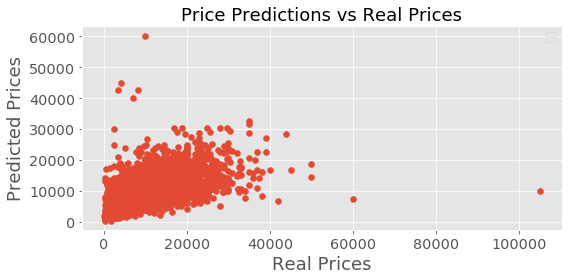

In [17]:
plt.scatter(y1_test, y_pred)
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

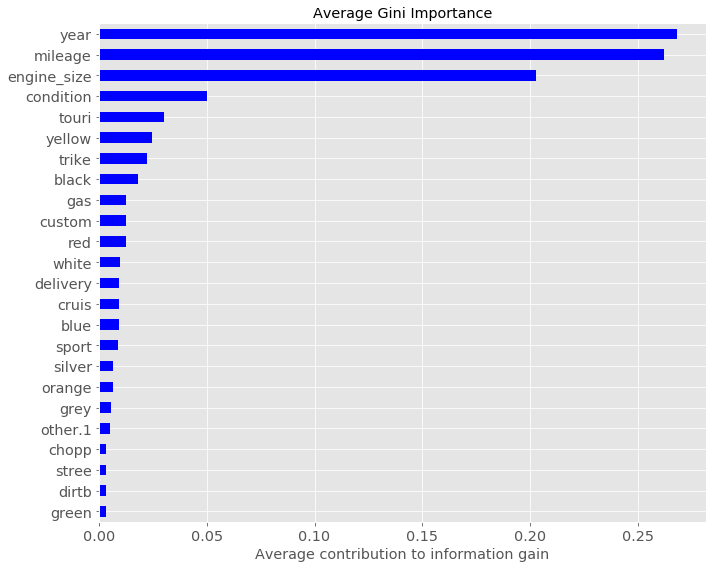

In [18]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [19]:
for idx, i in enumerate(df['price']):
    if i > 40000:
        df.drop(idx, axis=0, inplace = True)

In [20]:
df = df.reset_index(drop=True)

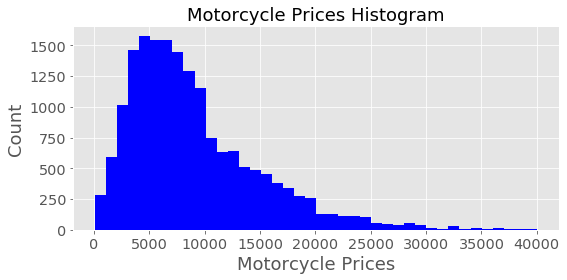

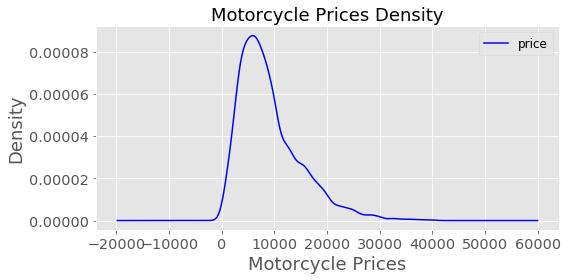

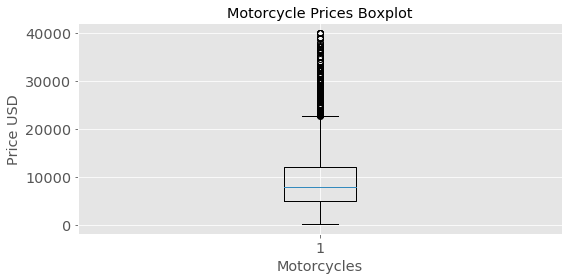

In [21]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

In [22]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1)
y1 = df['price']

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [24]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error : ', mean_squared_error(y1_test, y_pred))

R Squared :  		 0.4303736744626057
Out of Bag Score :  	 0.44112386452797847
Mean Squared Error :  20157500.635158714


In [25]:
np.sqrt(mean_squared_error(y1_test, y_pred))

4489.7105291052685

In [26]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


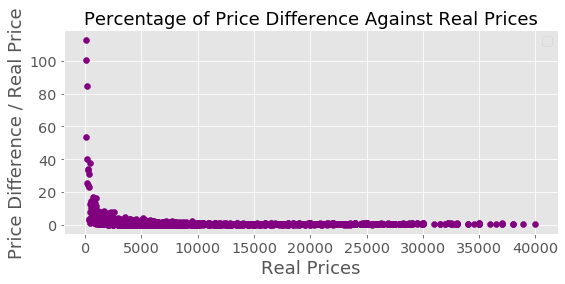

In [27]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


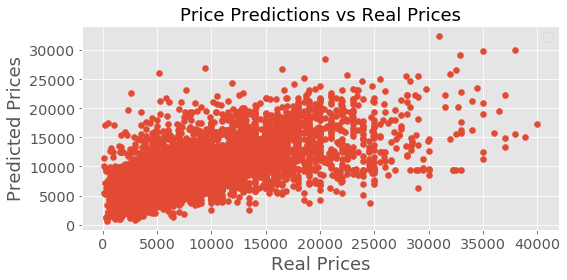

In [28]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

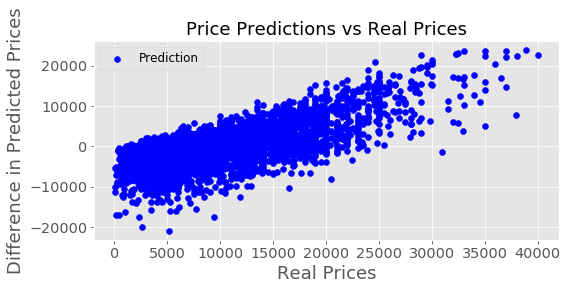

In [29]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

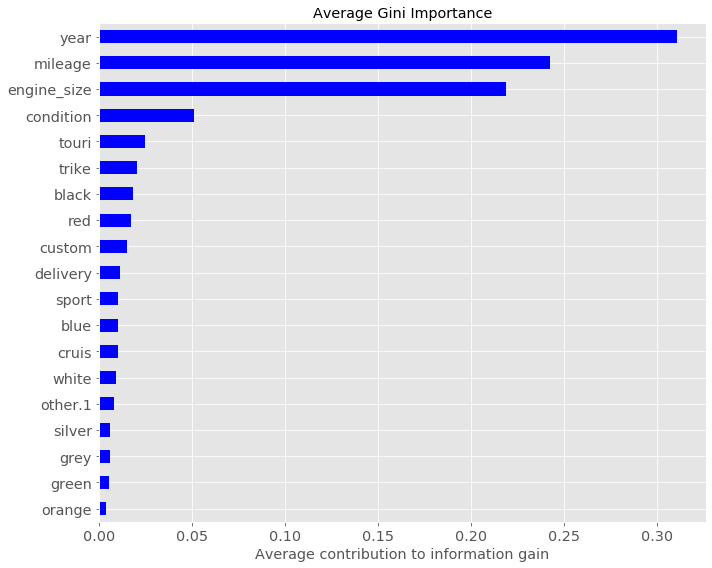

In [30]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [31]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [32]:
pos_or_neg

['over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 '

In [33]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [34]:
analysis_df['diff'] = diff

In [35]:
analysis_df['diff_percent'] = diff_percent

In [36]:
analysis_df['pos_or_neg'] = pos_or_neg

In [37]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5796 entries, 14192 to 14868
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           5796 non-null   object 
 1   year            5796 non-null   float64
 2   price           5796 non-null   float64
 3   neighborhood    5189 non-null   object 
 4   description     5796 non-null   object 
 5   url             5796 non-null   object 
 6   model           5796 non-null   object 
 7   vin             5796 non-null   int64  
 8   condition       5796 non-null   int64  
 9   cryptocurrency  5796 non-null   int64  
 10  delivery        5796 non-null   int64  
 11  engine_size     5796 non-null   float64
 12  fuel_type       5568 non-null   object 
 13  mileage         5796 non-null   float64
 14  color           5784 non-null   object 
 15  street_legal    5796 non-null   int64  
 16  title_status    5794 non-null   object 
 17  transmission    5796 non-nul

In [38]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

In [39]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5796 entries, 14192 to 14868
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           5796 non-null   object 
 1   pos_or_neg      5796 non-null   object 
 2   diff            5796 non-null   float64
 3   diff_percent    5796 non-null   float64
 4   price           5796 non-null   float64
 5   year            5796 non-null   float64
 6   mileage         5796 non-null   float64
 7   engine_size     5796 non-null   float64
 8   condition       5796 non-null   int64  
 9   neighborhood    5189 non-null   object 
 10  description     5796 non-null   object 
 11  url             5796 non-null   object 
 12  model           5796 non-null   object 
 13  vin             5796 non-null   int64  
 14  cryptocurrency  5796 non-null   int64  
 15  delivery        5796 non-null   int64  
 16  fuel_type       5568 non-null   object 
 17  color           5784 non-nul

In [40]:
adf_idx = analysis_df['diff'].sort_values().index

In [41]:
df.engine_size[1879]

895.5236939583598

In [42]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,year,mileage,engine_size,condition,neighborhood,...,purple,red,silver,white,yellow,diesel,electric,gas,hybrid,other.1
11083,2019 Harley-Davidson® Freewheeler®,over +,16008.630000,0.571839,27995.0,2019.0,1128.000000,895.523694,3,"Meridian, ID",...,0,0,0,0,0,0,0,1,0,0
10358,2020 Yamaha YZF-R3 ABS,short -,16036.417652,3.026310,5299.0,2020.0,2.000000,895.523694,6,"Frontenac, KS",...,0,0,1,0,0,0,0,1,0,0
10980,2019 Honda® CBR650R,short -,16071.695000,2.782496,5776.0,2019.0,1885.000000,895.523694,3,"Las Vegas, NV",...,0,1,0,0,0,0,0,1,0,0
3635,2019 Harley-Davidson Street Glide® Special Tou...,over +,16159.503689,0.646691,24988.0,2019.0,0.000000,895.523694,3,"Cotati, CA",...,0,0,0,0,0,0,0,1,0,0
9813,Honda scooter SA50P 2 cycle,short -,16191.265886,16.191266,1000.0,2020.0,1250.000000,895.523694,5,White BearLake,...,0,0,0,0,1,0,0,0,0,1
17395,1946 Knucklehead Harley,over +,16232.950000,0.579748,28000.0,1946.0,14077.353486,895.523694,3,Montello,...,0,0,0,0,0,0,0,1,0,0
9137,1965 Harley Panhead,over +,16582.314286,0.753742,22000.0,1965.0,14077.353486,895.523694,3,NaN,...,0,0,0,0,0,0,0,1,0,0
15693,2016 Harley-Davidson® FLTRUSE - Screamin' Eagl...,over +,16735.587500,0.507909,32950.0,2016.0,20815.000000,895.523694,3,"Farmers Branch, TX",...,0,0,0,0,0,0,0,1,0,0
12733,2020 CVO Limited,over +,16908.957262,0.463259,36500.0,2020.0,500.000000,895.523694,6,Raleigh,...,0,0,0,0,0,0,0,1,0,0
7180,2019 White Soleil Moped,short -,16934.300000,37.631778,450.0,2019.0,1736.000000,895.523694,3,Pupukea,...,0,0,0,1,0,0,0,1,0,0


In [43]:
df = df[df.engine_size != 895.5236939583598]

In [65]:
len(df)

8042

In [44]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1)
y1 = df['price']

In [45]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [46]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error : ', mean_squared_error(y1_test, y_pred))

R Squared :  		 0.6762321474635489
Out of Bag Score :  	 0.7045207941150153
Mean Squared Error :  9093294.416987447


In [47]:
np.sqrt(mean_squared_error(y1_test, y_pred))

3015.5089814138255

In [48]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


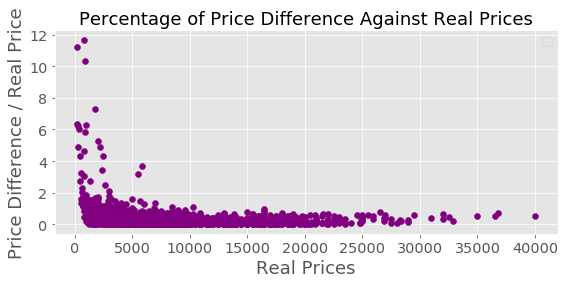

In [49]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


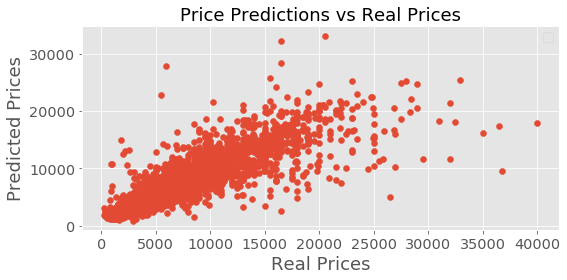

In [50]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

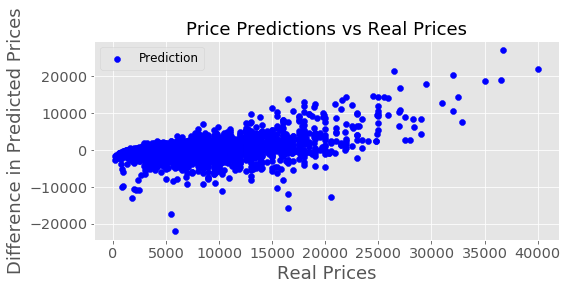

In [51]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

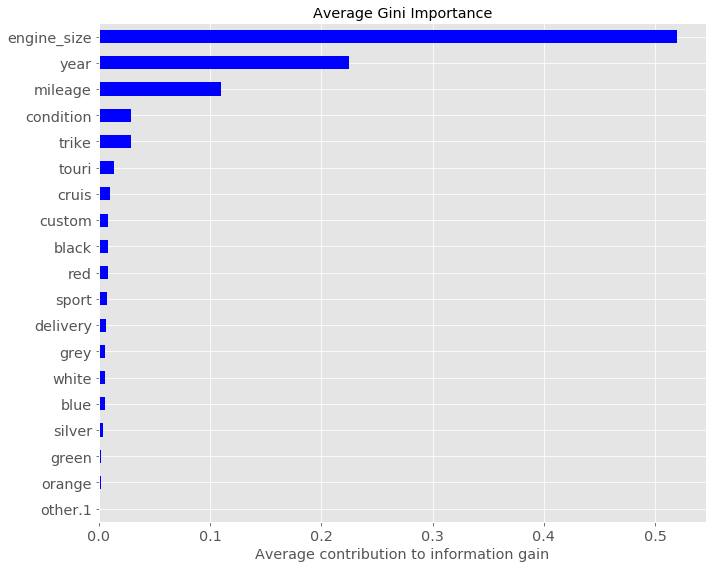

In [52]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [53]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [54]:
pos_or_neg

['short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 '

In [55]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [56]:
analysis_df['diff'] = diff

In [57]:
analysis_df['diff_percent'] = diff_percent

In [58]:
analysis_df['pos_or_neg'] = pos_or_neg

In [59]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654 entries, 2555 to 14783
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2654 non-null   object 
 1   year            2654 non-null   float64
 2   price           2654 non-null   float64
 3   neighborhood    2496 non-null   object 
 4   description     2654 non-null   object 
 5   url             2654 non-null   object 
 6   model           2654 non-null   object 
 7   vin             2654 non-null   int64  
 8   condition       2654 non-null   int64  
 9   cryptocurrency  2654 non-null   int64  
 10  delivery        2654 non-null   int64  
 11  engine_size     2654 non-null   float64
 12  fuel_type       2654 non-null   object 
 13  mileage         2654 non-null   float64
 14  color           2654 non-null   object 
 15  street_legal    2654 non-null   int64  
 16  title_status    2654 non-null   object 
 17  transmission    2654 non-null

In [60]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

In [61]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654 entries, 2555 to 14783
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2654 non-null   object 
 1   pos_or_neg      2654 non-null   object 
 2   diff            2654 non-null   float64
 3   diff_percent    2654 non-null   float64
 4   price           2654 non-null   float64
 5   year            2654 non-null   float64
 6   mileage         2654 non-null   float64
 7   engine_size     2654 non-null   float64
 8   condition       2654 non-null   int64  
 9   neighborhood    2496 non-null   object 
 10  description     2654 non-null   object 
 11  url             2654 non-null   object 
 12  model           2654 non-null   object 
 13  vin             2654 non-null   int64  
 14  cryptocurrency  2654 non-null   int64  
 15  delivery        2654 non-null   int64  
 16  fuel_type       2654 non-null   object 
 17  color           2654 non-null

In [62]:
adf_idx = analysis_df['diff'].sort_values().index

In [64]:
len(analysis_df)

2654

In [63]:
analysis_df.loc[adf_idx][-50:]

,title,pos_or_neg,diff,diff_percent,price,year,mileage,engine_size,condition,neighborhood,...,purple,red,silver,white,yellow,diesel,electric,gas,hybrid,other.1
10571,2009 Harley Davidson Screaming Eagle Softtail ...,over +,9757.955000,0.527457,18500.0,2009.0,7000.000000,1800.0,4,Troy,...,0,0,0,0,1,0,0,1,0,0
6693,NEW 110CC Coolster Kids ATV - BEST 1 YEAR WARR...,short -,9805.495000,10.332450,949.0,2020.0,14077.353486,110.0,6,Zephyrhills,...,0,0,0,0,0,0,0,1,0,0
492,2015 Harley Tri Glide,over +,9831.990000,0.427478,23000.0,2015.0,4477.000000,1688.0,5,Goodyear,...,0,0,0,0,0,0,0,1,0,0
6692,NEW 110CC Kids ATV - BEST 1 YEAR WARRANTEE - N...,short -,9905.495000,11.667250,849.0,2020.0,14077.353486,110.0,6,Zephyrhills,...,0,0,0,0,0,0,0,1,0,0
11766,2015 Can-Am Spyder Limited,over +,10081.880000,0.438438,22995.0,2015.0,1271.000000,0.0,4,"8590 State Highway 23 Oneonta, NY 13820",...,0,1,0,0,0,0,0,1,0,0
16158,2015 Harley Davidson Electra Glide Ultra LTD,over +,10167.985000,0.513535,19800.0,2015.0,9205.000000,127.0,5,st george utah,...,0,0,0,0,0,0,0,1,0,0
2286,2006 Ducati Sport Classic,over +,10260.230000,0.664093,15450.0,2006.0,8000.000000,1000.0,4,Venice,...,0,0,0,0,0,0,0,1,0,0
9485,"2017 Harley TriGlide Ultra - 107"" Milw 8 - Nav...",over +,10263.105000,0.381528,26900.0,2017.0,11300.000000,1753.0,4,Miller's - Petoskey,...,0,0,0,0,0,0,0,1,0,0
5478,2018 Harley Davidson Heritage Softail,short -,10289.625000,0.663847,15500.0,2018.0,6500.000000,114.0,5,McLean,...,0,0,0,0,0,0,0,1,0,0
15937,2004 Harley Davidson Ultra Classic Trike,over +,10376.645000,0.576480,18000.0,2004.0,15550.000000,1340.0,5,NaN,...,0,0,0,0,0,0,0,1,0,0


In [90]:
analysis_df['mileage'][1:2]

4377    14077.353486
Name: mileage, dtype: float64

In [94]:
len(df[df.mileage != 14077.35348599088])

21655

In [69]:
len(df)

8042

In [93]:
df['mileage'][0]

14077.35348599088